# Sentiment Analysis on twitter reviews
### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

### Importing the dataset

In [2]:
data=pd.read_csv(r'C:\Users\Lovely\Downloads\YouthIndi\dataset.csv', usecols=['Sentiment','SentimentText'])
data.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


### Visualizing the distribution of the data:

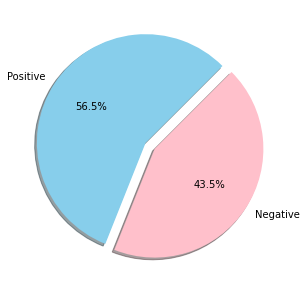

In [3]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['Sentiment']==1]
neg=data[data['Sentiment']==0]
ck=[pos['Sentiment'].count(),neg['Sentiment'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

### Removing unwanted characters

 1.Then we will import RE, that is, the regular expression operation, we use this library to remove html tags like anchot tag or. <br>
 2.So whenever we come across these tags, we replace them with an empty string. <br>
 3.Then we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /. We will change the emojis towards the end to get a clean set of text:<br>

In [4]:
import re
def preprocessor(SentimentText):
             SentimentText=re.sub('<[^>]*>','',SentimentText)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',SentimentText)
             SentimentText=re.sub('[\W]+',' ',SentimentText.lower()) +\
                ' '.join(emojis).replace('-','')
             return SentimentText  
data['SentimentText']=data['SentimentText'].apply(preprocessor)

### Stemming

Now, I’ll be using nltk’s PorterStemmer to simplify the data and remove unnecessary complexities in our text data:

In [5]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(SentimentText):
        return SentimentText.split()
def tokenizer_porter(SentimentText):
    return [porter.stem(word) for word in SentimentText.split()]

### Visualizing Negative and Positive Words
### To visualzie the negative and postive words using a wordcloud, I will first remove the stopwords:

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lovely\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


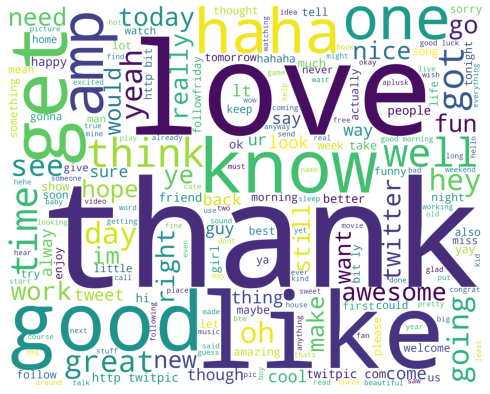

Negative words are as follows


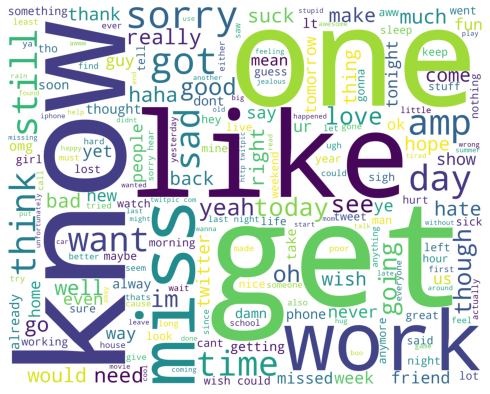

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['Sentiment'] == 1]
positivedata =positivedata['SentimentText']
negdata = data[data['Sentiment'] == 0]
negdata= negdata['SentimentText']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='lol' and word!='quot')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

### Target feature

In [9]:
y=data.Sentiment.values

In [10]:
x=tfidf.fit_transform(data.SentimentText)

### Splitting the dataset into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

### Creating  a logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegressionCV

In [23]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500)

### Fitting the data

In [24]:
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  8.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  8.9min finished


LogisticRegressionCV(cv=6, max_iter=500, n_jobs=-1, random_state=0,
                     scoring='accuracy', verbose=3)

### Testing using test dataset

In [25]:
y_pred = clf.predict(X_test)

### Accuracy

In [26]:
from sklearn import metrics

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.762996299629963
